In [52]:
from numpy import *
import matplotlib.pyplot as plt

In [53]:
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [54]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [55]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        if i % 50 == 0:
            coeff.append([m,b])
    return [b, m]

In [56]:
def run():
    points = genfromtxt("data1.csv", delimiter=",")
    learning_rate = 0.01
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

In [57]:
if __name__ == '__main__':
    coeff=[]
    run()

Starting gradient descent at b = 0, m = 0, error = 2645.8888888888887
Running...
After 1000 iterations b = 9.156933061452026, m = 4.801828040113966, error = 27.257449805186543


with learning rate = 0.01, After 1000 iterations b = 9.156933061452026, m = 4.801828040113966, error = 27.257449805186543

with learning rate = 0.0001, After 1000 iterations b = 1.0181191697476293, m = 5.56271831101697, error = 46.993575444299616

In [49]:
coeff

[[0.09173333333333335, 0.009088888888888888],
 [3.1885347788068743, 0.3242087630861992],
 [4.544413257852699, 0.47649618707854613],
 [5.137318595891673, 0.5573790626594318],
 [5.395847144837609, 0.6069267108157755],
 [5.507835562429938, 0.6427000367281512],
 [5.555605144943965, 0.672395405233221],
 [5.575234018515567, 0.6993859466264934],
 [5.582533774124861, 0.7251500897571269],
 [5.584433989578453, 0.7503358911239426],
 [5.583971610961059, 0.7752274878253363],
 [5.582477599321923, 0.7999495252648751],
 [5.580535250614349, 0.8245567496538037],
 [5.578400189063676, 0.8490732728288952],
 [5.5761844334918935, 0.8735097804554663],
 [5.573937066238679, 0.8978710736967346],
 [5.571679587128663, 0.9221593744274144],
 [5.569421407703633, 0.9463757737778822],
 [5.5671666417258185, 0.9705208669742662],
 [5.564917081184267, 0.9945950315645209]]

In [59]:
points = genfromtxt("data1.csv", delimiter=",")
pointsx, pointsy = points[:,0], points[:,1]

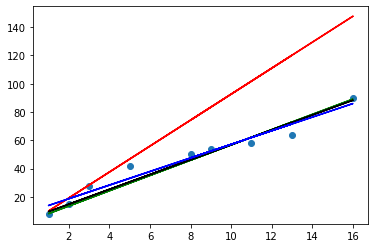

In [60]:
plt.scatter(pointsx, pointsy)
plt.plot(pointsx, coeff[0][0]*pointsx+coeff[0][1], 'r', )
plt.plot(pointsx, coeff[1][0]*pointsx+coeff[1][1], 'g')
plt.plot(pointsx, coeff[2][0]*pointsx+coeff[2][1], 'k')
plt.plot(pointsx, coeff[19][0]*pointsx+coeff[19][1], 'b')

In [61]:
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression()
lr.fit(pointsx.reshape(-1,1), pointsy.reshape(-1,1))
m_lr, b_lr = lr.coef_, lr.intercept_

In [64]:
m_lr, b_lr

(array([[4.7995889]]), array([9.18088386]))

In [65]:
y_pred = m_lr * pointsx + b_lr

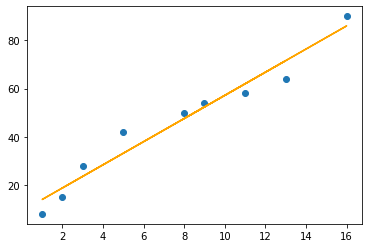

In [66]:
plt.scatter(pointsx, pointsy)
plt.plot(pointsx, ( m_lr * pointsx + b_lr )[0], 'Orange')

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
mean_squared_error(pointsy, y_pred[0])

27.257279890373404

In [69]:
from sklearn.metrics import r2_score

In [70]:
r2_score(pointsy, y_pred[0])

0.9530606413997736